In [246]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [247]:
telco_data =  pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/Telco-Customer-Churn.csv')


In [248]:
telco_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [249]:
telco_data.SeniorCitizen.value_counts()


0    4259
1     811
Name: SeniorCitizen, dtype: int64

In [250]:
telco_data.shape


(5070, 21)

In [251]:
telco_data.drop(columns='customerID',axis=1,inplace=True)
telco_data.shape

(5070, 20)

In [252]:
telco_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5070 entries, 0 to 5069
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5070 non-null   object 
 1   SeniorCitizen     5070 non-null   int64  
 2   Partner           5070 non-null   object 
 3   Dependents        5070 non-null   object 
 4   tenure            5070 non-null   int64  
 5   PhoneService      5070 non-null   object 
 6   MultipleLines     5070 non-null   object 
 7   InternetService   5070 non-null   object 
 8   OnlineSecurity    5070 non-null   object 
 9   OnlineBackup      5070 non-null   object 
 10  DeviceProtection  5070 non-null   object 
 11  TechSupport       5070 non-null   object 
 12  StreamingTV       5070 non-null   object 
 13  StreamingMovies   5070 non-null   object 
 14  Contract          5070 non-null   object 
 15  PaperlessBilling  5070 non-null   object 
 16  PaymentMethod     5070 non-null   object 


In [253]:
telco_data['TotalCharges'].value_counts()


           8
19.75      7
20.2       7
20.15      6
19.45      6
          ..
682.1      1
5903.15    1
89.3       1
4754.3     1
3902.6     1
Name: TotalCharges, Length: 4774, dtype: int64

In [254]:
telco_data.TotalCharges.isnull().sum()


0

In [255]:
df = telco_data[telco_data.TotalCharges!=" "]
df.shape
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [256]:
telco_data=df
telco_data.shape

(5062, 20)

In [257]:
convert = {'No':0,'Yes':1}
telco_data.Partner= telco_data.Partner.map(convert)
telco_data.TotalCharges= telco_data.TotalCharges.astype('float64')
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,0,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,0,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,0,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,0,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [258]:
telco_data.Churn

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
5065     No
5066     No
5067     No
5068     No
5069    Yes
Name: Churn, Length: 5062, dtype: object

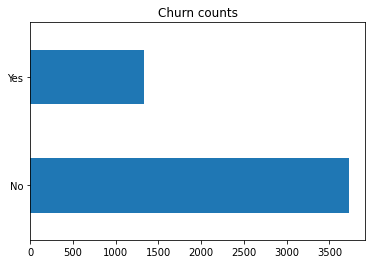

In [259]:
telco_data.Churn.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

In [260]:
telco_data.Churn = telco_data.Churn.replace({'Yes':1, 'No':0}) # Replacing 'Yes' and 'No' with numerical values

In [261]:
telco_data.TechSupport = telco_data.TechSupport.replace({'Yes':1, 'No':0, "No internet service":0})
telco_data.TechSupport.value_counts()

0    3617
1    1445
Name: TechSupport, dtype: int64

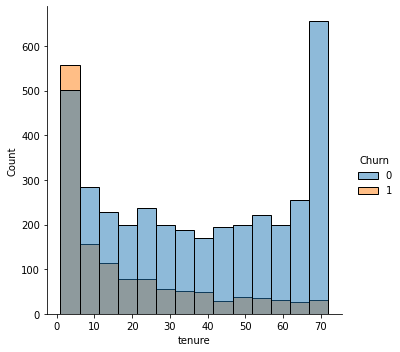

In [262]:
x=telco_data.tenure
y=telco_data.Churn
sns.displot(data=telco_data, x=telco_data.tenure, hue='Churn')


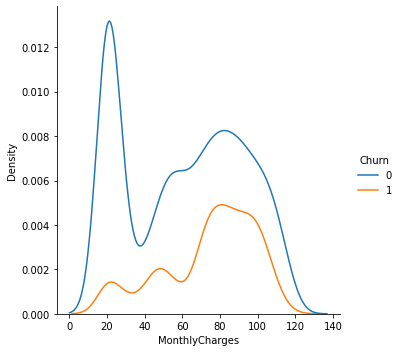

In [263]:
x=telco_data.MonthlyCharges
y=telco_data.Churn
sns.displot(data=telco_data, x=telco_data.MonthlyCharges, hue='Churn', kind='kde')

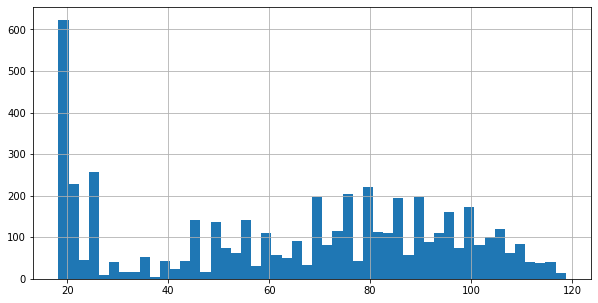

In [264]:
x.hist(bins=50, figsize = (10,5)) 

plt.show() 

In [265]:
telco_data.PhoneService = telco_data.PhoneService.replace({'Yes':1, 'No':0})

In [266]:
df2=telco_data.select_dtypes(exclude = 'number')
df2


,gender,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,No,No phone service,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,DSL,Yes,No,Yes,No,No,One year,No,Mailed check
2,Male,No,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...
5065,Male,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic)
5066,Male,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic)
5067,Female,Yes,No,DSL,Yes,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic)
5068,Female,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic)


In [267]:
for i in df2.columns:
    if df2[i].nunique() == 2:
        df2[i], _  = pd.factorize(df2[i])
    else:
        df2 = pd.get_dummies(df2, columns=[i])

df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,gender,Dependents,PaperlessBilling,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5065,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0
5066,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0
5067,0,1,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0
5068,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0


In [268]:
df1 = telco_data.select_dtypes(include = 'number')
df1

,SeniorCitizen,Partner,tenure,PhoneService,TechSupport,MonthlyCharges,TotalCharges,Churn
0,0,1,1,0,0,29.85,29.85,0
1,0,0,34,1,0,56.95,1889.50,0
2,0,0,2,1,0,53.85,108.15,1
3,0,0,45,0,1,42.30,1840.75,0
4,0,0,2,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...
5065,1,0,33,1,0,24.90,847.80,0
5066,0,1,44,0,0,54.30,2390.45,0
5067,0,1,30,1,1,66.30,1923.50,0
5068,0,1,71,1,0,20.90,1493.20,0


In [269]:
X = pd.concat([df1, df2], axis =1)
X.drop(columns='Churn',axis=1,inplace=True)
X

,SeniorCitizen,Partner,tenure,PhoneService,TechSupport,MonthlyCharges,TotalCharges,gender,Dependents,PaperlessBilling,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,0,0,29.85,29.85,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,34,1,0,56.95,1889.50,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1
2,0,0,2,1,0,53.85,108.15,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,0,45,0,1,42.30,1840.75,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,2,1,0,70.70,151.65,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5065,1,0,33,1,0,24.90,847.80,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0
5066,0,1,44,0,0,54.30,2390.45,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0
5067,0,1,30,1,1,66.30,1923.50,0,1,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0
5068,0,1,71,1,0,20.90,1493.20,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0


In [270]:
y = telco_data.pop('Churn') # Removing Churn field and storing it in variable y
#X = telco_data[['SeniorCitizen', 'TechSupport','tenure','PhoneService', 'MonthlyCharges']] # Creating a smaller subset of features

In [271]:
#dummy_variable_1 = pd.get_dummies(telco_data["PaymentMethod"]) 
#X = pd.concat([X, dummy_variable_1], axis=1) 
#dummy_variable_2 = pd.get_dummies(telco_data["Contract"]) 
#X = pd.concat([X, dummy_variable_2], axis=1) 
#X.head() 

# Splitting data

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [273]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3796 entries, 3958 to 506
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            3796 non-null   int64  
 1   Partner                                  3796 non-null   int64  
 2   tenure                                   3796 non-null   int64  
 3   PhoneService                             3796 non-null   int64  
 4   TechSupport                              3796 non-null   int64  
 5   MonthlyCharges                           3796 non-null   float64
 6   TotalCharges                             3796 non-null   float64
 7   gender                                   3796 non-null   int64  
 8   Dependents                               3796 non-null   int64  
 9   PaperlessBilling                         3796 non-null   int64  
 10  MultipleLines_No                         3796 

# Fitting model

In [274]:
# fit a model
clf = LogisticRegression(penalty='l2').fit(X_train, y_train)
# predict probabilities
predictions = clf.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Evaluating model

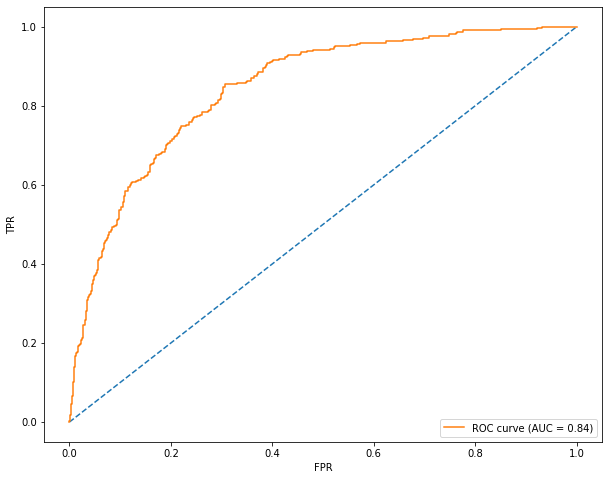

In [275]:
# calculate scores
auc = roc_auc_score(y_test, predictions)

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.figure(figsize=(10, 8))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

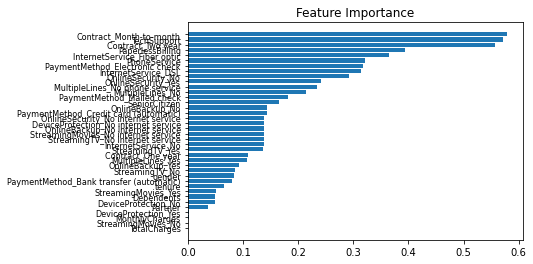

In [276]:
feature_importance = abs(clf.coef_[0])
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)

plt.title('Feature Importance')
plt.show()